<h2 align="center">Codebasics ML Course: Logistic Regression Tutorial (Multiclass Classification)</h2>

Problem Statement: Classify an IRIS flower into one of the three categories ['setosa', 'versicolor', 'virginica'] based on their petal and sepal width and height. We will use logistic regression for this classification problem

<img width=200, height=200 src = 'iris.png' />

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [8]:
iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
df = iris.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df['target'].unique()

array([0, 1, 2])

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
iris.filename

'iris.csv'

In [22]:
iris.data_module

'sklearn.datasets.data'

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [30]:
df['target_name'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

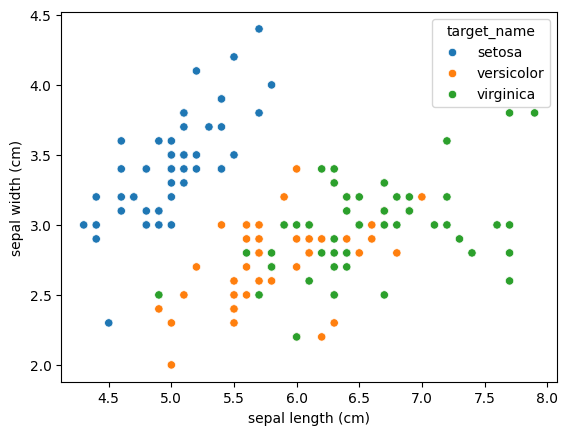

In [31]:
sns.scatterplot(df,x='sepal length (cm)',y='sepal width (cm)',hue='target_name',);

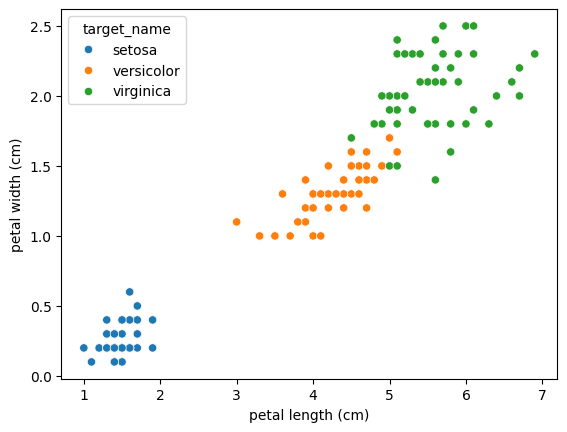

In [34]:
sns.scatterplot(df,x='petal length (cm)',y='petal width (cm)',hue='target_name',);

In [15]:
X,y = load_iris(return_X_y=True,as_frame=True)

In [16]:
X.shape,y.shape

((150, 4), (150,))

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
model.score(X_test,y_test)

1.0

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

1.0

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [45]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

Text(0.5, 1.0, 'Confusion matrix')

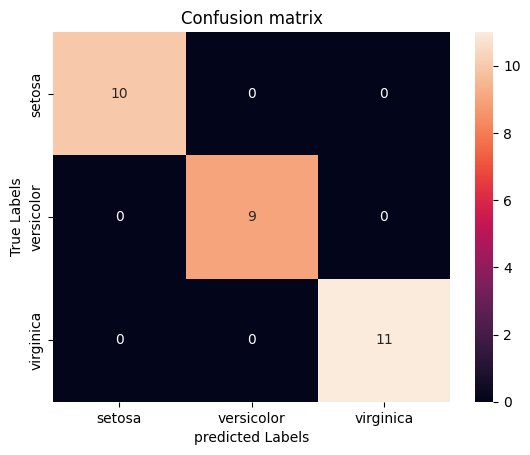

In [48]:
sns.heatmap(cm,xticklabels=iris.target_names,yticklabels=iris.target_names,annot=True);
plt.xlabel('predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion matrix')